In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
caminho_2019 = "../dados/obitos-2019.csv"
caminho_2020 = "../dados/obitos-2020.csv"
dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)

print(f"2019 {dados_2019.shape}")
print(f"2020 {dados_2020.shape}")

2019 (12339, 6)
2020 (14666, 6)


In [2]:
dados_2020.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,11
2,AC,OUTRAS,HOSPITAL,< 9,F,44
3,AC,OUTRAS,HOSPITAL,< 9,M,43
4,AC,OUTRAS,OUTRO,< 9,F,4


In [3]:
dados_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,8
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,56
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [4]:
dados_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
7531,MT,PNEUMONIA,OUTRO,60 - 69,F,1
4040,AM,PNEUMONIA,HOSPITAL,40 - 49,M,79
10069,AC,COVID,OUTRO,80 - 89,M,2
9948,SP,INDETERMINADA,OUTROS_SERVICOS_SAUDE,70 - 79,F,8
1592,RO,INSUFICIENCIA_RESPIRATORIA,HOSPITAL,10 - 19,M,2


In [5]:
len(dados_2019["uf"].unique())

27

In [6]:
dados_2019["tipo_doenca"].unique()

array(['OUTRAS', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG', 'COVID'], dtype=object)

In [7]:
dados_2019["tipo_doenca"].value_counts()

OUTRAS                        3834
PNEUMONIA                     2351
INSUFICIENCIA_RESPIRATORIA    2317
SEPTICEMIA                    2058
INDETERMINADA                 1297
SRAG                           481
COVID                            1
Name: tipo_doenca, dtype: int64

In [8]:
dados_2020["tipo_doenca"].value_counts()

OUTRAS                        3739
INSUFICIENCIA_RESPIRATORIA    2303
PNEUMONIA                     2194
COVID                         2063
SEPTICEMIA                    1993
INDETERMINADA                 1307
SRAG                          1067
Name: tipo_doenca, dtype: int64

In [9]:
dados_2020.groupby("tipo_doenca").sum()

,total
tipo_doenca,
COVID,177299
INDETERMINADA,9063
INSUFICIENCIA_RESPIRATORIA,93304
OUTRAS,647807
PNEUMONIA,171938
SEPTICEMIA,153033
SRAG,15715


In [10]:
dados_2019.groupby("tipo_doenca").sum()

,total
tipo_doenca,
COVID,1
INDETERMINADA,6977
INSUFICIENCIA_RESPIRATORIA,100361
OUTRAS,658891
PNEUMONIA,225933
SEPTICEMIA,175104
SRAG,1497


In [11]:
total_obitos_2019 = dados_2019.groupby("tipo_doenca").sum()
total_obitos_2020 = dados_2020.groupby("tipo_doenca").sum()

In [12]:
total_obitos_2019

,total
tipo_doenca,
COVID,1
INDETERMINADA,6977
INSUFICIENCIA_RESPIRATORIA,100361
OUTRAS,658891
PNEUMONIA,225933
SEPTICEMIA,175104
SRAG,1497


In [13]:
total_obitos_2020

,total
tipo_doenca,
COVID,177299
INDETERMINADA,9063
INSUFICIENCIA_RESPIRATORIA,93304
OUTRAS,647807
PNEUMONIA,171938
SEPTICEMIA,153033
SRAG,15715


In [14]:
proporcao = total_obitos_2020/total_obitos_2019
proporcao

,total
tipo_doenca,
COVID,177299.000000
INDETERMINADA,1.298982
INSUFICIENCIA_RESPIRATORIA,0.929684
OUTRAS,0.983178
PNEUMONIA,0.761013
SEPTICEMIA,0.873955
SRAG,10.497662


In [15]:
total_obitos_2019.loc["SRAG"]

total    1497
Name: SRAG, dtype: int64

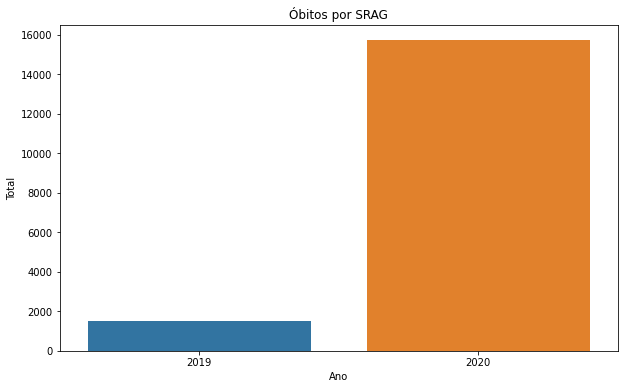

In [16]:
def grafico_comparativo(causa):

    total_2019=dados_2019.groupby("tipo_doenca").sum()
    total_2020=dados_2020.groupby("tipo_doenca").sum()
    lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]
    dados = pd.DataFrame({"Total": lista,
                          "Ano": [2019,2020] })

    plt.figure(figsize=(10,6))
    sns.barplot(x="Ano", y = "Total", data = dados)        
    plt.title(f"Óbitos por {causa}")
    plt.show()

grafico_comparativo("SRAG")

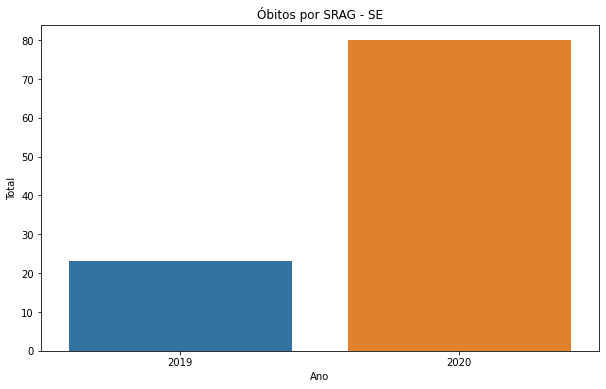

In [17]:
def grafico_comparativo(causa, estado="BRASIL" ):

    if estado == "BRASIL":
        total_2019=dados_2019.groupby("tipo_doenca").sum()
        total_2020=dados_2020.groupby("tipo_doenca").sum()
        lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]
        dados = pd.DataFrame({"Total": lista,
                            "Ano": [2019,2020] })
    else:

        lista_campos = ["uf","tipo_doenca"]
        total_2019=dados_2019.groupby(lista_campos).sum()
        total_2020=dados_2020.groupby(lista_campos).sum()
        lista = [int(total_2019.loc[estado, causa]), int(total_2020.loc[estado, causa])]
        dados = pd.DataFrame({"Total": lista,
                            "Ano": [2019,2020] })

    plt.figure(figsize=(10,6))
    sns.barplot(x="Ano", y = "Total", data = dados)        
    plt.title(f"Óbitos por {causa} - {estado}")
    plt.show()

grafico_comparativo("SRAG", "SE")    

In [18]:
t = dados_2020.groupby(["uf","tipo_doenca"]).sum()
t.loc["SE","COVID"]

total    1963
Name: (SE, COVID), dtype: int64